## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [129]:
# Import libraries needed for calculations
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Make sure the output is show below each cell
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [130]:
# Read in the data set and show the first 5 rows
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [131]:
# Display the dimensions of the data set (rows, columns)
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [132]:
# Display number of unique items in user_id column
df.user_id.nunique()

290584

d. The proportion of users converted.

In [133]:
# Display the percentage of users that have converted "1"
converted_sum = (df.converted.sum()/df.user_id.count())
str(round(converted_sum,5) * 100) + "%"

'11.966%'

e. The number of times the `new_page` and `treatment` don't match.

In [134]:
# Number of new_pages showing in the control group that should be the old page
control_errors = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

# Number of old pages showing in the new page group.
treatment_errors = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]

# Combined missmatched pages.
non_match = control_errors + treatment_errors
non_match.shape[0]

3893

f. Do any of the rows have missing values?

In [135]:
# Display if any entries have missing values using info(), which shows if non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [136]:
# Copy data set to new data frame df2
df2=df
# Drop missmatched entries
df2.drop(non_match.index, inplace=True)
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [137]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [138]:
# Check for unique entries in the df2 data set
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [139]:
# Original data had 294478 rows. Less 3893 mismatched rows we dropped = 290,585
# The 290,585 less 290584 nunique() results = 1 duplicate

# Display user_id entries with duplicates 
df2[df2.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [140]:
# Display row information for duplicates
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [141]:
# Drop 1 row with dpulicate information
df2=df2.drop(2893)

In [142]:
# Checking that final count should be 290584 rows
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [143]:
# Calculating the average number of converted users vs total users
converted_sum2 = (df2.converted.sum()/df2.user_id.count())
str(round(converted_sum2,5) * 100) + "%"

'11.96%'

b. Given that an individual was in the `control` group, what is the probability they converted?

In [144]:
# Calculating average number of control group users that converted
control_prob = df2[df2['group'] == 'control']['converted'].mean()
str(round(converted_prob,5) * 100) + "%"

'12.039%'

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [145]:
# Calculating average number treatment group users that converted
treatment_prob = df2[df2['group'] == 'treatment']['converted'].mean()
str(round(treatment_prob,5) * 100) + "%"

'11.881%'

d. What is the probability that an individual received the new page?

In [146]:
# Calculating the average number of users that receive a new page
new_page_prob = df2[df2['landing_page'] == 'new_page'].count()/df2.shape[0]
str(round(new_page_prob[1],5) * 100) + "%"

'50.006%'

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Ans:**  
At first blush, it doesn't appear in the data analysis that the new treatment page leads to a significatantly higher converstion rate than the prior old page. The control group (12.039% conversion) showed a fractionally higher rate of converstion vs the treatment group (11.881%) of 0.158% or a 1.33% (0.158%/11.881%) increase over the treatment group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Ans:**

$H_{0}$: $p_{old}$ >= $p_{new}$ 

$H_{1}$: $p_{new}$ > $p_{old}$

Preassumed threhold α = 0.05 (level of significance). If p-value is greater than 0.05, then there would insufficient evidence to reject the null hypothesis. If p-value is less than 0.05, then there would be evidence to reject the null.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{new}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [147]:
# Calculate the H0 overall converted average
p_null = df2['converted'].sum()/df2.shape[0]
str(round(p_null,5) * 100) + "%"

'11.96%'

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [148]:
# Calculate the old page converted average
str(round(p_null,5) * 100) + "%"

'11.96%'

c. What is $n_{new}$, the number of individuals in the treatment group?

In [149]:
# Count number of users in the treatment group
new_page_count = df2[df2['group'] == 'treatment'].count()
n_new = new_page_count[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [150]:
# Count number of users in the control group
old_page_count = df2[df2['group'] == 'control'].count()
n_old = old_page_count[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [151]:
# Create a random sample set based on p_null and n_new counts using a binomial distribution (1's and 0's)
new_page_converted = np.random.binomial(1, p_null, n_new)
str(round(new_page_converted.mean(),5) * 100) + "%"

'11.875%'

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [152]:
# Create a random sample set based on p_null and n_old counts using a binomial distribution (1's and 0's)
old_page_converted = np.random.binomial(1, p_null, n_old)
str(round(old_page_converted.mean(),5) * 100) + "%"

'11.932%'

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [153]:
# Calculate difference between n_new and n_old randomized data sets
sim_diff = new_page_converted.mean() - old_page_converted.mean()
str(round(sim_diff,5) * 100) + "%"

'-0.057%'

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [154]:
# Creating 10,000 values using the randomized binomial distribution for n_new and n_old
# storing results in p_diffs dataframe
p_diffs = []
# Randomized binomial distributions of 10,000 each
new_converted_simulation = np.random.binomial(n_new, p_null, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_null, 10000)/n_old

# Calcuate the difference between the two randomized sets and store them in p_diffs
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

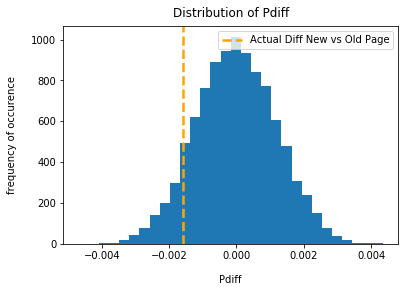

In [155]:
# Creating a histogram plot of the simulated differences
act_diff = treatment_prob - control_prob
plt.hist(p_diffs, bins = 30);
plt.title("Distribution of Pdiff", y=1.015, fontsize=12)
plt.axvline(x=act_diff, linestyle='--', linewidth=2.5, label="Actual Diff New vs Old Page", c='orange')
plt.xlabel("Pdiff", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

**Ans:** The histogram plot does have a even distribution based on the generated sample distribution as expected.


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [156]:
# Calculating portion of the simulated p_diffs that are different from the original data set mean
# Createting data set for calculation
p_diffs_calc = np.array(p_diffs)

In [157]:
# Calculating the simulated difference from the actual mean
act_diff = treatment_prob - control_prob

p_val = (p_diffs_calc > act_diff).mean()
print('p-value: {}'.format(round(p_val,5)))

p-value: 0.9072


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Ans:**  
The value calculated is the p-value. The p-value is calculated using the sampling distribution of the test statistic under the null hypothesis, the sample data, and the type of test being done (single vs two tailed). Given that the null hypothesis is true, the probability of observing our statistic in favor of the alternative. 

In this case, the large p-value suggests that we fail to reject the null hypothesis.  Since the the p-value is above our predetermined threshold value of α = 0.05, this means we do not have enough evidence to reject the null hypothesis $H_{0}$: $p_{old}$ >= $p_{new}$ .

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [158]:
# Import statsmodels library
import statsmodels.api as sm

# Calculate totals for our simulation
convert_old = df2[df2['group'] == 'control']['converted'].sum()
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()
n_old =  len(df2[df2['landing_page']=='old_page'])
n_new = len(df2[df2['landing_page']=='new_page'])
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [159]:
# Using built-in stats model Z-test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],
                                             alternative="smaller")
print('Z-score: {}, p-value: {}'.format(round(z_score,5), round(p_value, 5)))

Z-score: 1.31092, p-value: 0.90506


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Ans:**
The Z-score means that the difference between our test statistic and the null hypothesis is 1.31 standard deviations above the mean. In an upper tailed Z test, if α = 0.05 then the critical value is Z=1.645. Since, our Z-score is less than the critical amount of 1.645, then we can't reject the null hypothesis.

Additionally, the p-value here is 0.90506, which is higher than our α threshold of α = 0.05, so the Z-test appears to agree with the previous findings.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Ans:**   This is a logistic based regression, since our data is binary (1s and 0s) and not a linear data set.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [160]:
# Create our regression features
df2['intercept'] = 1
# Convert categorical "group" variable into dummy/indicator variables.
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('a_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [161]:
# Initiating the logistic regression model
# Dependent or target variable is converted, ab_page is our independent variable or feature
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results_1 = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [162]:
# Summary of our model
print(results_1.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-12 06:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



In [163]:
# Display parameters
np.exp(results_1.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [164]:
# Display parameters logistic function
1/np.exp(results_1.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Ans:**
The value here is negative, so we must first convert it. Essentially, it's suggesting that the new landing page is 1.015 less likely to convert.

This model is attempting to predict whether a user will convert depending on the page they received. Our previous analysis looked at if the old page had a higher conversion rate than the new page. In this logistic regression analysis, the null hypothesis is when ab_page = 1, converted = 0; the alternative hypothesis is when ab_page = 1, converted is likely to be 1.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Ans:**  
At this point, it does not appear that the treatment or control page has much impact on whether a user converts. Therefore, it is probably a good idea to see whether other factors/features might predict conversion to avoid incorrectly not rejecting the null hypothesis. It is important to be when selecting features to make sure that the variables aren't too related to each other.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [165]:
# Testing if origin of country influences conversion
# Load in country data and review top 5 rows
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [166]:
# Merge country data with our data set
df3 = df2.merge(countries_df, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [167]:
# Unique list of countries in data set
countries_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [168]:
# As before, we need to convert country codes to numbers/dummy variables for calculations
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
# Create logistic regression model now using converted features
logit_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
results_2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [169]:
# Display results
print(results_2.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-12 06:02 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359



In [170]:
# Display parameters
np.exp(results_2.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

In [171]:
# Display parameters logistic function
1/np.exp(results_2.params)

intercept    7.310207
ab_page      1.015056
CA           1.041599
UK           0.990165
dtype: float64

**Ans:**  
Based on the p-values above, it appears that origin of country does not have a significant impact on page conversion. Statistically speaking, there doesn't appear to be much variation between countries.

Similar to before, CA is 1.04 times less likely to convert while UK is 1.01 times more likely to convert.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [172]:
# Create data set including group_country combined feature
df4=df3
df4['group_country'] = df3['group'] + '_' + df3['country']
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,group_country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,control_US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,control_US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,treatment_US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,treatment_US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,control_US


In [173]:
# Verify unique group_country
df4['group_country'].unique()

array(['control_US', 'treatment_US', 'treatment_CA', 'treatment_UK',
       'control_CA', 'control_UK'], dtype=object)

In [174]:
# Create variable dummies for group_country feature
df4[['control_US', 'treatment_US', 'treatment_CA', 'treatment_UK',
       'control_CA', 'control_UK']] = pd.get_dummies(df4['group_country'])
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,group_country,control_US,treatment_US,treatment_CA,treatment_UK,control_CA,control_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,control_US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,control_US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,treatment_US,0,0,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,treatment_US,0,0,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,control_US,0,0,1,0,0,0


In [175]:
# Create our country/group model
logit_mod3 = sm.Logit(df4['converted'], df4[['intercept', 'UK', 'CA',
        'treatment_UK', 'treatment_CA']])
results_3 = logit_mod3.fit()
# Display model results
print(results_3.summary2())

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6
                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-12-12 06:02 AIC:              212780.8857
No. Observations:   290584           BIC:              212833.7840
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -2.0070   0.0097 -207.0454 0.0000 -2.0260 -1.9880
UK                0.0202   0.0150    1.3513 0.1766 -0.0091  0.0496
CA                0.0030   0.0377    0.0805 0.9358 -0

**ANS:**
Based on the p-values above, it also does not appear as though country has a significant impact on conversion.

In [176]:
# Country model parameters
np.exp(results_3.params)

intercept       0.134386
UK              1.020435
CA              1.003040
treatment_UK    0.934776
treatment_CA    1.020776
dtype: float64

In [177]:
# Country model parameters comparison
print(1/np.exp(results_3.params))

intercept       7.441269
UK              0.979974
CA              0.996969
treatment_UK    1.069775
treatment_CA    0.979646
dtype: float64


**ANS:**
This regression summary shows that the country of origin and the type of page based on their p-values do not provide a statistical basis to reject the null hypothesis, based on our α = 0.05.

As before: treatment_UK is 1.07 times less likely to convert while the UK is 1.02 times more likely to convert. It's possible that there is some differences related to country preferences, but the differences are rather small.

**Conclusions:**
In this analysis, we wanted to look at the difference of conversion rates between a new landing page versus the older landing page. Our testing null hypothesis was that our new landing page would convert users at the same rate as the older landing page. The alternative hypothesis was that the new landing page conversion rate would be different than the original.

We measured the results in the supplied data and found that with a single tailed test p-value 0.05 that we did not have enough evidence to reject the null hypothesis. We also verfied this by calculating the Z-score and found that the result was also not significant enought to reject the null.

We later applied simulated analysis using a binomial distribution and found similar results.

To better understand the features of the data, we created a logistic regression analysis model. There were no significant differences than above. Also, we added the user origin of country to the analsis with similar results.

Limitations:
The data didn't include other demographics like age, gender, or education. 

Recommendations:
Based on our current analysis, we would not reject the null hypothesis and continue using the old landing page, as the conversion rate isn't significantly better for the new landing page.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [178]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0